In [7]:
#all my fave imports in case I need them later
import numpy as np
from scipy.optimize import *
from scipy.integrate import *
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore') #living dangerously

### Problem 2A.)

Using a similar method to construct the X and Z rate equations.  In these equations, each term is in units of concentration per time.  Subsequently, in part b, they will be put into dimensionless form.  In each equation, the term right of the equality containts the production term and degradation term.  The difference of these two terms is the differential rate of the species with respect to time.  

Thus, we obtain,

$$\frac{d \tilde X}{d\tilde t}=\frac{\tilde \alpha_x + \tilde \beta_x S}{1+S+(\frac{\tilde Z}{\tilde z_X})^{n_{zx}}}-\tilde \delta_X \tilde X \hspace{20mm} (A)$$

$$\frac{d \tilde Z}{d\tilde t}=\frac{\tilde \alpha_z}{1+(\frac{\tilde X}{\tilde x_Z})^{n_{xz}}}-\tilde \delta_Z \tilde Z \hspace{20mm} (B)$$

Note that only X is activated by S in this circuit (as S occurs in the numerator and denominator of (A)).  Additionally, as can be seen by the existence of $\tilde Z$ in the denominator of (A) and $\tilde X$ in the denominator of (B), both species repress each other.  Both species also decay at a rate proportional to their own concentration, times some constant, $\tilde \delta_X$, and $\tilde \delta_Z$ respectively.

Note: in my work, I will refer to equations by letter name, to avoid confusion as the equations are numbered in the paper.

### Problem 2B.)

Starting with (A) and (B) as obtained in part a, we look to convert each term from units of concentration/time, to dimensionless.  Here, we will use simple symbols, without the tilde to represent dimensionless parameters of variables that previously included the tilde.  

Looking at the simple degradation terms first, we note the $\tilde \delta_i$ parameters have units of 1/time.  Here, we will normalize these variables by the degradation rate of $\tilde X$ by convention.  It should be noted that this is a chocie and we could have easily normalized based on $\tilde Z$ degradation rate.  Thus we obtain:

$$ \delta_Z = \frac{\tilde \delta_Z}{\tilde \delta_X} \hspace{20mm} \delta_X = \frac{\tilde \delta_X}{\tilde \delta_X} =1$$

Similarly, to continue creating dimensioneless time, we define:

$$ t = \tilde t \tilde \delta_X $$

It should be noted that $\textbf{there is a minor mistake}$ in the 'Star Methods' presented in the Perez-Carrasco paper (attatched on GitHub as `problem2_referencePaper.pdf`).  In their equation (3), they define time as $ t = \tilde t \delta_X $.  Of course, as shown previously, $\delta_X$ without a tilde equals 1 and is dimensionless, so $t$ and $\tilde t$ would be equivalent.  This syntaxtical error would fail to eliminate the time dimension from (1).

To create dimensionless concentration variables, we normalize by the production rate $\tilde \alpha_Z$.  This choice, as explained previously is arbitrary and we could've instead normalized with respect to $\tilde \alpha_X$.  However, proceeding, we obtain:

$$ \alpha_X = \frac{\tilde \alpha_X}{\tilde \alpha_Z} \hspace{20mm} \alpha_Z = \frac{\tilde \alpha_Z}{\tilde \alpha_Z}=1 \hspace{20mm}  \beta_X = \frac{\tilde \beta_X}{\tilde \alpha_X}$$

Next with the core variables, $\tilde X$ and $\tilde Z$, and other concentration parameters, $\tilde x_Z$ and $\tilde z_X$, we multiply by $\tilde \delta_X$ to create units concentration/time before dividing by $\tilde \alpha_Z$ to create dimensionless parameters:

$$ X = \frac{\tilde X \tilde \delta_X}{\tilde \alpha_Z} \hspace{20mm} Z = \frac{\tilde Z \tilde \delta_X}{\tilde \alpha_Z} \hspace{20mm} x_Z = \frac{\tilde x_Z \tilde \delta_X}{\tilde \alpha_Z} \hspace{20mm} z_X = \frac{\tilde z_X \tilde \delta_X}{\tilde \alpha_Z} $$

As noted in the Perez-Carrasco paper, the signal, S, is measured in arbitrary units and is used as a control parameter, so the same result will hold for any 'non-linear relationship between concentration of inducer and S'.  Finally, substituting our parameters into (A) and (B) yield:

$$  \frac{\tilde \delta_X \tilde \alpha_Z}{\tilde \delta_X} \frac{d X}{d t}=\frac{\tilde \alpha_Z(\alpha_x + \beta_x S)}{1+S+(\frac{\tilde \alpha_Z \tilde \delta_X}{\tilde \alpha_Z \tilde \delta_X}\frac{ Z}{ z_X})^{n_{zx}}}- (\frac{\tilde \delta_X \tilde \alpha_Z}{\tilde \delta_X})\delta_X X $$

$$\frac{\tilde \delta_X \tilde \alpha_Z}{\tilde \delta_X} \frac{d Z}{d t}=\frac{ \tilde \alpha_z (\alpha_z)}{1+(\frac{\tilde \alpha_Z \tilde \delta_X}{\tilde \alpha_Z \tilde \delta_X}\frac{ X}{ x_Z})^{n_{xz}}}-(\frac{\tilde \delta_X \tilde \alpha_Z}{\tilde \delta_X})\delta_Z Z)$$

Algebraically simplifying and equating $\alpha_Z$ and $\delta_X$ to 1 yields the equations in dimensionless form:

$$ \frac{d X}{d t}=\frac{\alpha_x + \beta_x S}{1+S+(\frac{Z}{z_X})^{n_{zx}}}- X \hspace{20mm} (3)$$

$$\frac{d Z}{d t}=\frac{1}{1+(\frac{X}{x_Z})^{n_{xz}}}-\delta_Z Z \hspace{20mm} (4)$$

### Problem 2C.)

To obtain steady state values we equate the derivatives in (3) and (4) equal to zero:

$$ 0=\frac{\alpha_x + \beta_x S}{1+S+(\frac{Z}{z_X})^{n_{zx}}}- X$$

$$0=\frac{1}{1+(\frac{X}{x_Z})^{n_{xz}}}-\delta_Z Z$$

From here, steady state values of X can be found by solving the system simultaneously.  The results and plots are shown below.

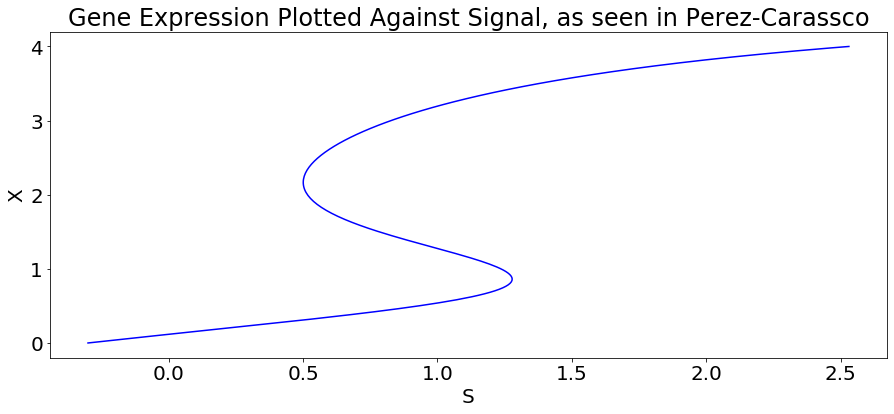

In [8]:
#Problem 2C

#import constants
alphaX=1.5; betaX=5; zX=0.4; nZX=2.7; xZ=1.5; nXZ=2.7; deltaZ=1;

#iterate across range of X to get behavior where there are multiple X values for a given S
n=200; #number of steps parameter.
X=np.linspace(0,4,n)
S=np.zeros(n)
Z=np.zeros(n) #minus well store Z even though we won't use it

for i in range(n):
    guess=np.array([1,1])
    
    #local system to handle fsolve python syntax p=[S,Z]
    def XZsystem(p):
        F=np.empty((2))
        F[0]=(alphaX + betaX * p[0])/(1 + p[0] + np.power(p[1]/zX,nZX))-X[i]
        F[1]= 1/(1+np.power(X[i]/xZ,nXZ)) - deltaZ*p[1]
        return F
    
    S[i],Z[i]=fsolve(XZsystem,guess)
    guess[0]=S[i]
    guess[1]=Z[i]
    
plt.rcParams["figure.figsize"] = (15,6) 
plt.rcParams.update({'font.size': 20})
plt.plot(S,X,'b-');
plt.xlabel('S');
plt.ylabel('X');
plt.title('Gene Expression Plotted Against Signal, as seen in Perez-Carassco');
plt.show()


Two figures have been plotted above.  The first of which shows the stable and unstable steady-states for X across varying S as requested to reproduce the figure from Perez-Carassco.  The 'bonus' was solved at the same time as the original problem in my implementation, so I did not make separate plots for it as the unstable values are those between the two saddles and shown in the figure above.  

### Problem 2D.)

The system of equations from Perez-Carassco is avaliable for viewing in their paper as EQ (1) .  It has been solved and plotted against time below.

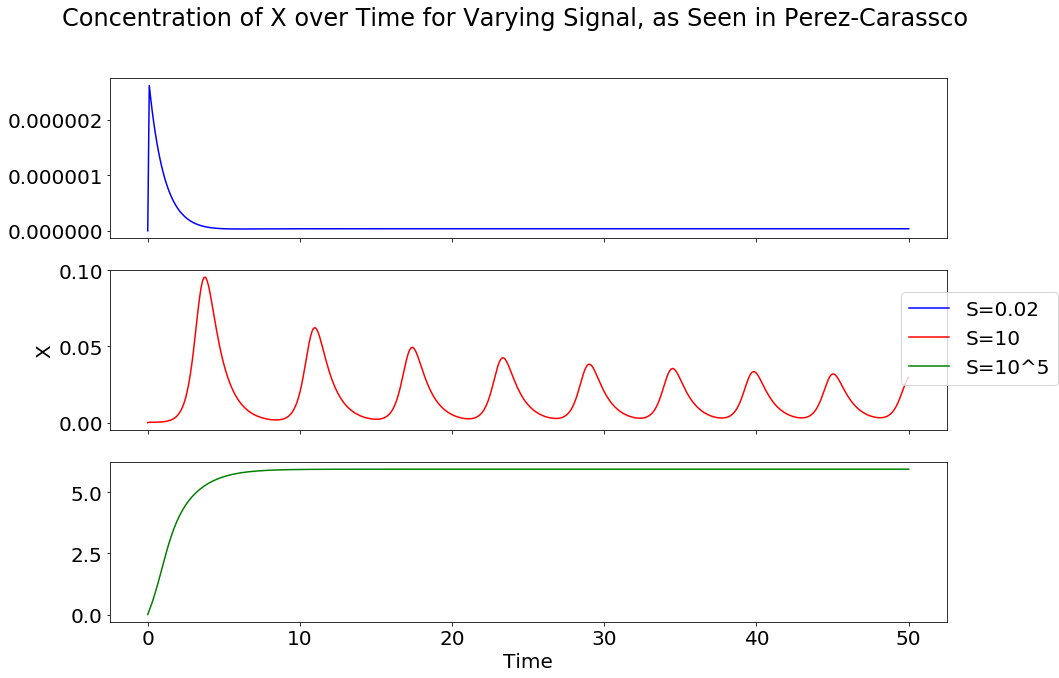

In [9]:
m=501
S=np.array([0.02,10,np.power(10,5)]) #three values of S
t=np.linspace(0,50,m)
xSolTot=np.zeros((m,np.size(S))) #matrix for storing three time dependent data sets

for i in range(np.size(S)):
    def ACDCsystem(w,t=np.linspace(0,50,101)):
        """
        Defines the system of coupled differential equations from Perez-Carassco (AC-DC)
        w: vector of the state variables -- w=[X,Y,Z]
        t: time (defaults to [0,50] by increments of 0.5)--useful for fsolve handling (don't need to add args terms)
        """
        X, Y, Z = w
        alphaX=0.039; alphaY=0.0043; betaX=6.1; betaY=5.7; deltaY=1.05; deltaZ=1.04;
        zX=0.000013; yZ=0.011; xZ=0.12; xY=0.00079; nZX=2.32; n=2; #rest of hill exponents 
        F=np.empty(3)
        
        F[0]= ((alphaX+betaX*S[i])/(1+S[i]+np.power(Z/zX,nZX)))-X
        F[1]= ((alphaY+betaY*S[i])/(1+S[i]+np.power(X/xY,n)))-(deltaY*Y)
        F[2]= (1/(1+np.power(X/xZ,n)+np.power(Y/yZ,n)))-(deltaZ*Z)
        return F
    
    w0=[0,0,0] #0 initial conditions
    solution=odeint(ACDCsystem,w0,t) 
    xSol=solution[:,0]
    xSolTot[:,i]=xSol
    
x1=xSolTot[:,0] #pop individual vectors from loop variable
x2=xSolTot[:,1]
x3=xSolTot[:,2]

#plotting on 3 subplots sharing x axis
plt.rcParams["figure.figsize"] = (15,10)
fig, (ax1,ax2,ax3) = plt.subplots(3,sharex=True)
fig.suptitle('Concentration of X over Time for Varying Signal, as Seen in Perez-Carassco')
ax1.plot(t,x1,'b-');
ax2.plot(t,x2,'r-');
ax3.plot(t,x3,'g-');
ax2.set_ylabel('X')
ax3.set_xlabel('Time')
line_labels=["S=0.02","S=10","S=10^5"]
fig.legend([x1, x2, x3],labels=line_labels,loc="center right",borderaxespad=0.1);

The figure above is consistent with Figure 2 in Perez-Carassco.  For low values of S ($S<10^{-2}$), the system stays at nearly 0 for all time.  For intermediate S ($10^{-1}<S<10^4$), the system oscillates through time, on the order of $10^{-1}$.  For large values of S ($S>10^4$), the system is constant with a value on the order of $10^1$.   

### Problem 2E.)

We look to solve the steady state equations (1) where all derivative terms are equal to zero.  We run the same system locally in problem E, such to make work cleaner even though it involves repeating a function from part d.

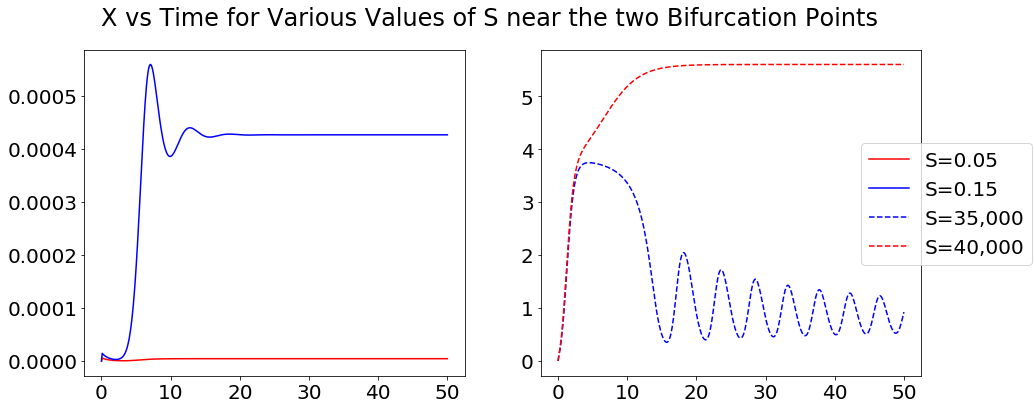

In [10]:
def ACDCsystem(w,t=np.linspace(0,50,101)):
        """
        Defines the system of coupled differential equations from Perez-Carassco (AC-DC)
        w: vector of the state variables -- w=[X,Y,Z]
        t: time (defaults to [0,50] by increments of 0.5)--useful for fsolve handling (don't need to add args terms)
        """
        X, Y, Z = w
        alphaX=0.039; alphaY=0.0043; betaX=6.1; betaY=5.7; deltaY=1.05; deltaZ=1.04;
        zX=0.000013; yZ=0.011; xZ=0.12; xY=0.00079; nZX=2.32; n=2; #rest of hill exponents 
        F=np.empty(3)
        
        F[0]= ((alphaX+betaX*S[i])/(1+S[i]+np.power(Z/zX,nZX)))-X
        F[1]= ((alphaY+betaY*S[i])/(1+S[i]+np.power(X/xY,n)))-(deltaY*Y)
        F[2]= (1/(1+np.power(X/xZ,n)+np.power(Y/yZ,n)))-(deltaZ*Z)
        return F

w0=[0,0,0]
S=[0.05,0.15,35000,40000]

plt.rcParams["figure.figsize"] = (15,6)

i=0; solution=odeint(ACDCsystem,w0,t);
xSol1=solution[:,0]
i=1; solution=odeint(ACDCsystem,w0,t);
xSol2=solution[:,0]
i=2; solution=odeint(ACDCsystem,w0,t);
xSol3=solution[:,0]
i=3; solution=odeint(ACDCsystem,w0,t);
xSol4=solution[:,0]

fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(t,xSol1,'r-');
ax1.plot(t,xSol2,'b-');
ax2.plot(t,xSol3,'b--');
ax2.plot(t,xSol4,'r--');
line_labels=["S=0.05","S=0.15","S=35,000","S=40,000"]
fig.legend([xSol1, xSol2, xSol3, xSol4],labels=line_labels,loc="center right",borderaxespad=0.1);
fig.suptitle('X vs Time for Various Values of S near the two Bifurcation Points');

From the analysis above, we can conclude that S=0.05 is a value just barely below Hopf bifurcation (which has evidently begun by S=0.15).  S=40,000 is just barely above the saddle bifurcation (which evidently shows oscillations at S=35,000).  

Thus we use these values moving forward in the problem:

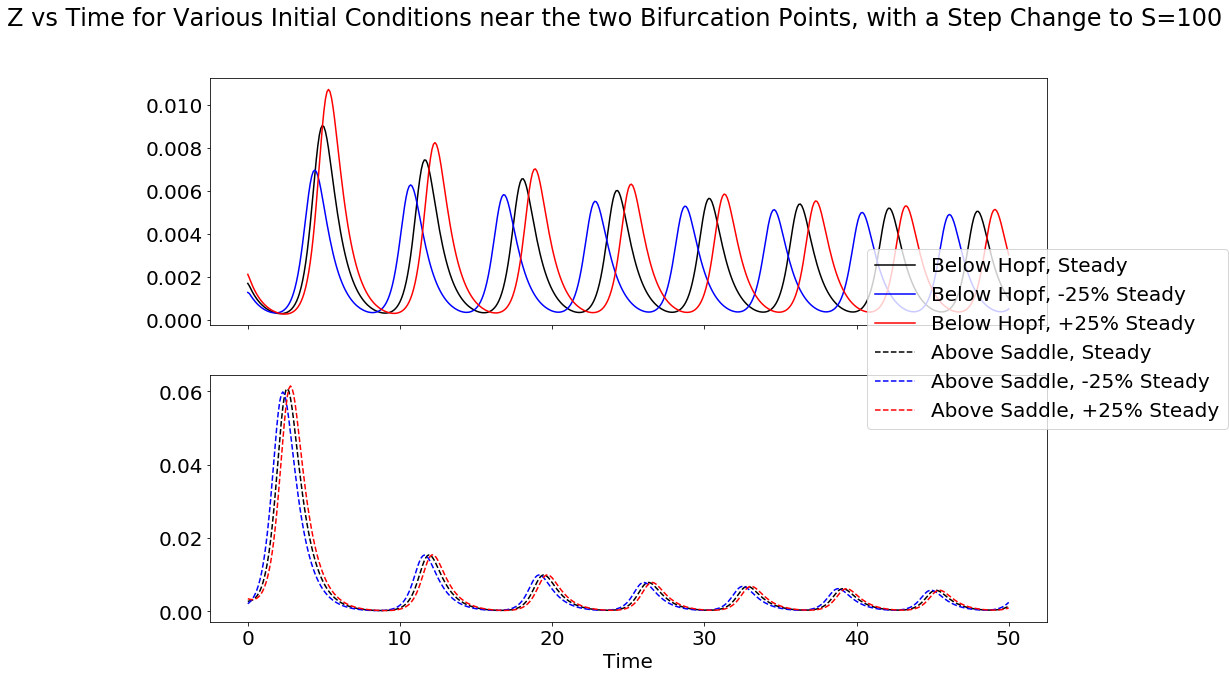

In [11]:
S_low=0.05; S_high=40000;
S=[S_low,S_high]

i=0; #for S_low
guess=np.array([0,0,0]) #guess in the form [X,Y,Z]
X1,Y1,Z1=fsolve(ACDCsystem,guess)
conditions1=np.array([X1,Y1,Z1]) #correct steady for S_low
conditions1_low=conditions1*0.75 #lower than steady by 25%
conditions1_high=conditions1*1.25 #higher than steady by 25%

i=1; #for S_high
X2,Y2,Z2=fsolve(ACDCsystem,guess)
conditions2=np.array([X2,Y2,Z2]) #correct steady for S_high
conditions2_low=conditions2*0.75 #lower than steady by 25%
conditions2_high=conditions2*1.25 #higher than steady by 25%

S=[100,100]; i=0;

#solve ODE systems
sol1=odeint(ACDCsystem,conditions1,t) 
zSol1=sol1[:,2]
sol1_low=odeint(ACDCsystem,conditions1_low,t) 
zSol1_low=sol1_low[:,2]
sol1_high=odeint(ACDCsystem,conditions1_high,t) 
zSol1_high=sol1_high[:,2]
sol2=odeint(ACDCsystem,conditions2,t) 
zSol2=sol2[:,2]
sol2_low=odeint(ACDCsystem,conditions2_low,t) 
zSol2_low=sol2_low[:,2]
sol2_high=odeint(ACDCsystem,conditions2_high,t) 
zSol2_high=sol2_high[:,2]

plt.rcParams["figure.figsize"] = (15,10)
fig,(ax1,ax2)=plt.subplots(2,sharex=True)
ax1.plot(t,zSol1,'k-');
ax1.plot(t,zSol1_low,'b-');
ax1.plot(t,zSol1_high,'r-')
ax2.plot(t,zSol2,'k--');
ax2.plot(t,zSol2_low,'b--');
ax2.plot(t,zSol2_high,'r--');
ax2.set_xlabel('Time')
line_labels=["Below Hopf, Steady","Below Hopf, -25% Steady","Below Hopf, +25% Steady",
             "Above Saddle, Steady","Above Saddle, -25% Steady","Above Saddle, +25% Steady"]
fig.legend([zSol1, zSol1_low, zSol1_high, zSol2, zSol2_low, zSol2_high],labels=line_labels,
           loc="center right",borderaxespad=0.1);
fig.suptitle('Z vs Time for Various Initial Conditions near the two Bifurcation Points, with a Step Change to S=100');

In the figure above, steady state cells, and perturbed steady state cells (+25%, -25% concentration) are brought from either low S values below Hopf bifurcation or high S values above saddle bifurcation to S=100, which is well within the oscillatory regime.  Depending on the previous conditions of the cell, however, notably different behavior is shown.  

From the graphs above, we can see that the oscillations for the system coming from below Hopf are out of phase, or are $\textbf{incoherent}$.  The systems coming from above Saddle are in phase with one another, meaning they are $\textbf{coherent}$.  

This is relevant, as often surrounding cells do not have exactly the same internal composition.  If this is the case, the cells ill all oscillate through the pathway in sync if coherent.  However, if there are many cells with slightly different inital concentrations and the system is incoherent, it will be nearly impossible to tell that oscillatory behavior is taking place as ll the oscillations out of phase create sufficient 'noise'.  

Ultimately, as discussed in the paper, Hopf bifurcation starts with initial paths quite close to the spiral center.  This causes very small deviations to 'blow up'  as the magnitude of oscillation increases.  However, just the opposite is true in the Saddle bifurcation.  Initial paths are quite far from the spiral center, so the small deviations actually appear to get smaller as the oscillation becomes tighter.

### Problem 2F.)

Qualitatively, we can expect it to be possible to achieve coherent oscillations when decreasing S=105 to S=100, as part E has previously shown it possible to generate coherent oscillations when decreasing S=34,500 to S=100.  However, as this is from above saddle bifurcation, it seems best to try to generate such a scenario specifically here.  

In this procedure, a steady set of oscillations is generated at S=100, starting from zero initial conditions (as this is most common in the paper).  

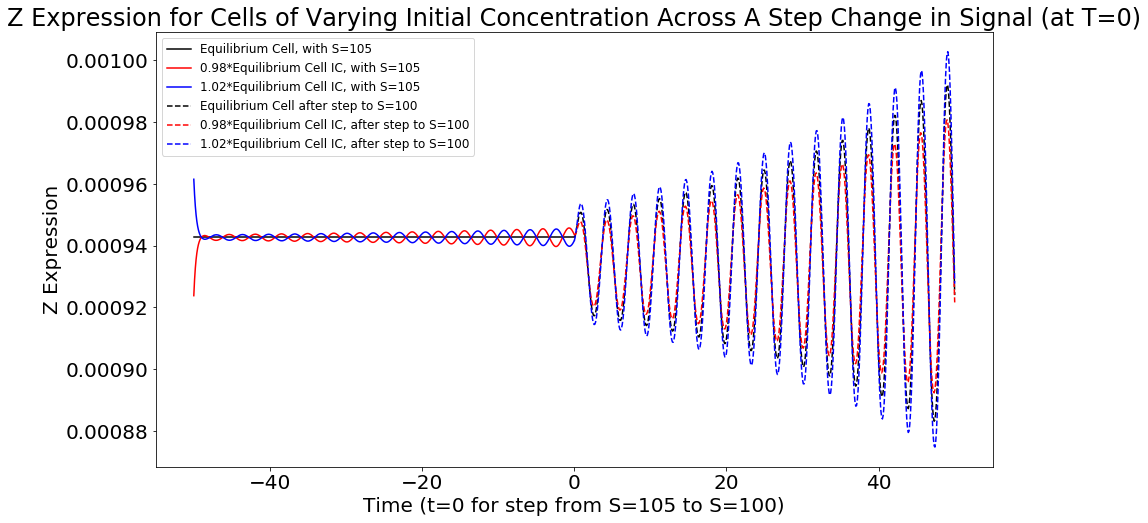

In [12]:
S=[105,100]
i=0;
t0=50
step=500 #number of intervals
guess=np.array([1,1,1]) #guess in the form [X,Y,Z]
X105,Y105,Z105=fsolve(ACDCsystem,guess) #generates a possible state for initial conditions-- note many are possible
conditions105=np.array([X105,Y105,Z105]) #assigns 'steady state conditions'
conditions105_low=conditions105*0.98 #small pertubation between cells for initial conditions
conditions105_high=conditions105*1.02 
t=np.linspace(0,t0,step+1)

#numerically integrate system over 50 seconds to see behavior before S step from 105 to 100
sol105=odeint(ACDCsystem,conditions105,t) 
xSol105=sol105[:,0]
ySol105=sol105[:,1]
zSol105=sol105[:,2] 
sol105_low=odeint(ACDCsystem,conditions105_low,t)
xSol105_low=sol105_low[:,0]
ySol105_low=sol105_low[:,1]
zSol105_low=sol105_low[:,2]
sol105_high=odeint(ACDCsystem,conditions105_high,t)
xSol105_high=sol105_high[:,0]
ySol105_high=sol105_high[:,1]
zSol105_high=sol105_high[:,2]

#considering time step
i=1; #switch S value
#assign initial conditions as end of previous time dependent solutions (continuous behavior through time)
conditions100=np.array([xSol105[step],ySol105[step],zSol105[step]])
conditions100_low=np.array([xSol105_low[step],ySol105_low[step],zSol105_low[step]])
conditions100_high=np.array([xSol105_high[step],ySol105_high[step],zSol105_high[step]])

#resolve system with new value for S=100, continuing from end of previous
sol100=odeint(ACDCsystem,conditions100,t) 
xSol100=sol100[:,0]
ySol100=sol100[:,1]
zSol100=sol100[:,2] 
sol100_low=odeint(ACDCsystem,conditions100_low,t)
xSol100_low=sol100_low[:,0]
ySol100_low=sol100_low[:,1]
zSol100_low=sol100_low[:,2]
sol100_high=odeint(ACDCsystem,conditions100_high,t)
xSol100_high=sol100_high[:,0]
ySol100_high=sol100_high[:,1]
zSol100_high=sol100_high[:,2]

#plotting
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(t-t0,zSol105,'k-',label='Equilibrium Cell, with S=105'); #subtract time to have t=0 be step change to S=100
plt.plot(t-t0,zSol105_low,'r-',label='0.98*Equilibrium Cell IC, with S=105');
plt.plot(t-t0,zSol105_high,'b-',label='1.02*Equilibrium Cell IC, with S=105');

plt.plot(t,zSol100,'k--',label='Equilibrium Cell after step to S=100');
plt.plot(t,zSol100_low,'r--',label='0.98*Equilibrium Cell IC, after step to S=100');
plt.plot(t,zSol100_high,'b--',label='1.02*Equilibrium Cell IC, after step to S=100');

plt.xlabel('Time (t=0 for step from S=105 to S=100)');
plt.ylabel('Z Expression');
plt.title('Z Expression for Cells of Varying Initial Concentration Across A Step Change in Signal (at T=0)');
plt.legend(loc='best',prop={'size':12});

As we can see in the figure above, it is possible to achieve coherent oscillations after a Step from S=105 to S=100.  However, the figure is somewhat misleading as it implies the data at S=105 is completely incoherent.  However, as can be seen here, the cells do not have their high peaks and low peaks align, but their periods are the same, prior to the step change in S.  However, when including noise in the values, these small magnitude oscillations can be made to look utterly incoherent, in a somewhat misleading way.  Nonetheless, coherent oscillations are still generated after the step change in S, though one could argue that the system was coherent before the step change as well.  This is somewhat intuitive, as previous analysis indicated S=105 is well within the oscillatory regime.  Thus, I do believe the figure was created with values from or similar to table S.1.  However, the existence of noise and the difference in magnitudes of the oscillation causes the plot to be somewhat misleading in the paper.    